In [1]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np 
import pandas as pd 
import shutil
import sys
import os

In [0]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/blind_detect/final_dataset')

In [0]:
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.preprocessing import image
from keras.applications import VGG16
from keras.optimizers import Adam
import keras.backend as K

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy

%matplotlib inline

# Visualise the Picture of Eye

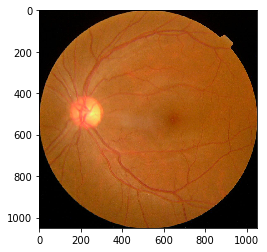

In [5]:
PATH = "test/train_split0/0e0003ddd8df.png"
for i in range(0,1):
    p = PATH.format(i)
    image = mpimg.imread(p) # images are color images
    plt.imshow(image)

#### Rescaling the image and generating it using ImageDataGenerator function 


In [10]:
train_datagen= ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.1, horizontal_flip= True)
valid_datagen= ImageDataGenerator(rescale=1./255)
size=(128,128)          #reshape the image in  (128,128)
in_shape=(128,128,3)   #input shape of image is  (128,128,3)
train_set= train_datagen.flow_from_directory('train', 
                                             target_size=size, batch_size=50, class_mode='categorical', 
                                             shuffle=True, seed=20)
valid_set= valid_datagen.flow_from_directory('val', 
                                             target_size=size, batch_size=50, class_mode='categorical', 
                                             shuffle=False)

Found 2929 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [11]:
#using pre-trained model VGG16
base_model=VGG16(input_shape=in_shape, weights='imagenet', include_top=False)

W0901 16:25:12.983040 140677917128576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 16:25:13.026040 140677917128576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 16:25:13.036108 140677917128576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 16:25:13.095909 140677917128576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 5s 0us/step


W0901 16:25:18.891970 140677917128576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0901 16:25:18.893314 140677917128576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:197: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



### Adding dense layers on top of VGG16 layer architecture

In [0]:
x=base_model.output
x=Conv2D(32, (3,3), activation='relu')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x=Dense(units=128, activation='relu')(x)
x=Dense(units=64, activation='relu')(x)
x=Dense(units=32, activation='relu')(x)
x=Dense(units=5, activation='softmax')(x)

In [0]:
model=Model(inputs=base_model.inputs, outputs=x)
for layer in model.layers[:16]:
  layer.trainable=False

for layer in model.layers[16:]:
    layer.trainable=True

### Compile and fitting the model

In [0]:
#Compile and fit the datasets
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
step_size_train=train_set.n//train_set.batch_size
step_size_valid=valid_set.n//valid_set.batch_size
model.fit_generator(train_set, steps_per_epoch=step_size_train, epochs=10, 
                    validation_data= valid_set, validation_steps=step_size_valid)
#Save model
model.save('save_vgg16_model.h5')

Epoch 1/10
58/58 [==============================] - 1797s 31s/step - loss: 1.2499 - acc: 0.5953 - val_loss: 0.9956 - val_acc: 0.6306
Epoch 2/10
58/58 [==============================] - 1244s 21s/step - loss: 0.8607 - acc: 0.6877 - val_loss: 1.0429 - val_acc: 0.6369
Epoch 3/10
58/58 [==============================] - 1256s 22s/step - loss: 0.8196 - acc: 0.7062 - val_loss: 0.7827 - val_acc: 0.7257
Epoch 4/10
58/58 [==============================] - 1238s 21s/step - loss: 0.8214 - acc: 0.7052 - val_loss: 0.6223 - val_acc: 0.7484
Epoch 5/10
58/58 [==============================] - 1249s 22s/step - loss: 0.7911 - acc: 0.7157 - val_loss: 0.7320 - val_acc: 0.7038
Epoch 6/10
58/58 [==============================] - 1264s 22s/step - loss: 0.7545 - acc: 0.7215 - val_loss: 0.7659 - val_acc: 0.7261
Epoch 7/10
58/58 [==============================] - 1253s 22s/step - loss: 0.7401 - acc: 0.7329 - val_loss: 0.7922 - val_acc: 0.7293
Epoch 8/10
58/58 [==============================] - 1223s 21s/step - 

### Saved the model after training

In [14]:
from keras.models import load_model
model=load_model('save_vgg16_model.h5')


W0901 16:26:04.300236 140677917128576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0901 16:26:04.533844 140677917128576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
import os
label=os.listdir('/content/drive/My Drive/blind_detect/final_dataset/test')
pred1=np.array([])
conf=np.array([])
true=np.array([])

In [0]:
y=pd.read_csv('/content/drive/My Drive/blind_detect/test.csv')

In [17]:
y.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


### Making Predictions

In [0]:
for i in y['id_code']:
  img=image.load_img(('/content/drive/My Drive/blind_detect/final_dataset/test_images/'+i+".png"),target_size=size)
  img=image.img_to_array(img)
  img=img.reshape(1,128,128,3)
  output=model.predict(img)
  pred1=np.append(pred1,(np.argmax(output[0])))
    
  

In [0]:
pred = []
for j in pred1:
  pred.append(int(j))
print(pred)

[2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 3, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 3, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0, 0, 3, 2, 2, 0, 2, 0, 2, 3, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 

In [0]:
x = pd.DataFrame({'id_code':y['id_code'],'diagnosis': pred })

In [0]:
x.head()

,id_code,diagnosis
0,0005cfc8afb6,2
1,003f0afdcd15,2
2,006efc72b638,2
3,00836aaacf06,2
4,009245722fa4,2
